In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

dataset = pd.read_csv("train.csv")


In [2]:
%matplotlib inline

,1,2,3
Survived,136,87,119
Died,80,97,372


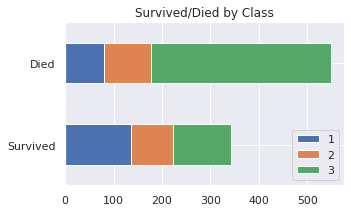

In [4]:
import seaborn
seaborn.set() 

#Survived/Died by Class

survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='barh',stacked=True, figsize=(5,3), title="Survived/Died by Class")

# display table
from IPython.display import display
display(df_class)

,female,male
Survived,233,109
Died,81,468


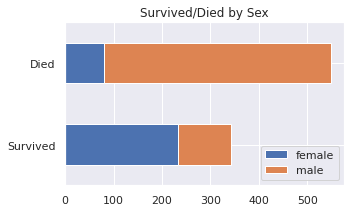

In [5]:
#Survived by gender

Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='barh',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100

# display table
from IPython.display import display
display(df_sex) 

<AxesSubplot:title={'center':'Survived/Died by Age'}>

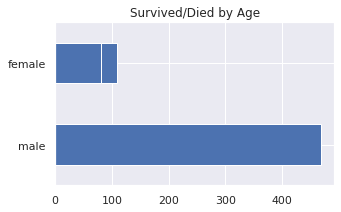

In [6]:
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()

Survived.plot(kind='barh',stacked=True, figsize=(5,3), title="Survived/Died by Age")
Died.plot(kind='barh',stacked=True, figsize=(5,3), title="Survived/Died by Age")

,S,C,Q
Survived,217,93,30
Died,427,75,47


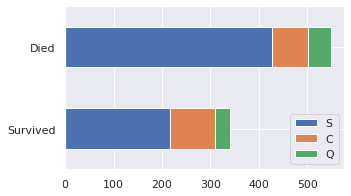

In [7]:
#Survived by embarked

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='barh',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100

from IPython.display import display
display(df_embark)

In [8]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                     
X=X.drop(['Survived'], axis=1)       

X.head(10)


,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [9]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(X.Embarked , prefix='Embarked')
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


In [10]:
print ('Number of null values in Age:', sum(X.Age.isnull()))
 
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]


title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)

Number of null values in Age: 177


/tmp/ipykernel_3417/1824686530.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age[i] = title_mean_age[1][j]


In [11]:
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

/tmp/ipykernel_3417/2782950372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age[i]= 0
/tmp/ipykernel_3417/2782950372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age[i]= 1


,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [12]:
#Applying the different classificatoin algorithms

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


Logistic Regression:
 Accuracy: 0.7721722846441947 +/- 0.019403532546552114 

K-NN:
 Accuracy: 0.7979525593008738 +/- 0.028588729149067415 

SVM:
 Accuracy: 0.7979525593008738 +/- 0.029026966282469747 

Naive Bayes:
 Accuracy: 0.7699375780274657 +/- 0.018054765417447587 

Random Forest:
 Accuracy: 0.8103121098626715 +/- 0.031228768966544584
